In [ ]:
!pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 3.1 MB/s eta 0:00:00


In [ ]:
from google.colab import userdata
GROQ_API_KEY=userdata.get('GROQ_API_KEY')

In [ ]:
import pandas as pd

def load_data(path):
    df = pd.read_csv(path)


    def clean_description(description):
        if pd.isna(description):
            return description
        price_description = 'Giá sản phẩm trên Tiki đã bao gồm thuế theo luật hiện hành. Bên cạnh đó, tuỳ vào loại sản phẩm, hình thức và địa chỉ giao hàng mà có thể phát sinh thêm chi phí khác như phí vận chuyển, phụ phí hàng cồng kềnh, thuế nhập khẩu (đối với đơn hàng giao từ nước ngoài có giá trị trên 1 triệu đồng).....'
        if price_description in description:
            description = description.replace(price_description, '')

        return description.replace('\n', ' ').replace('\xa0', ' ').strip()

    def clean_highlight(highlight):
        if pd.isna(highlight):
            return ''
        highlight_list = eval(highlight)

        if isinstance(highlight_list, list):
            return '"' + ' '.join(highlight_list) + '"'

    df['description'] = df['description'].apply(clean_description)

    df['full_description'] = "Tên sách: " + df['name'].fillna('') + '. ' + \
                         "Tác giả: " + df['author'].fillna('') + ". " + \
                         "Thể loại: " + df['category'].fillna('') + ". " + \
                         "Highlight: " + df['highlight'].apply(clean_highlight) + ". " + \
                         "Mô tả: " + df['description'].fillna('')

    return df

path = '/content/book_data.csv'
df = load_data(path)

In [ ]:
df['full_description'][3]

'Tên sách: Combo Sách Osho - Đàn Ông + Đàn Bà + Ươm Mầm. Tác giả: . Thể loại: Truyện ngắn - Tản văn - Tạp Văn Nước Ngoài. Highlight: "Tác giả phân tích vai trò đàn ông và định hình năng lượng sáng tạo. Sách về phụ nữ giúp hiểu tâm lý phụ nữ từ tư duy và nhận thức. Sách về trẻ em khám phá sự tự do và sáng tạo tự nhiên.". Mô tả: 1. ĐÀN ÔNGBạn thật may mắn khi được sống trong thời đại này bởi có một điều vô cùng vĩ đại sắp xảy ra – đó là sự gặp gỡ giữa khoa học và tôn giáo, sự gặp gỡ giữa Đông và Tây, sự gặp gỡ giữa hướng ngoại và hướng nội. Điều này sẽ tạo ra một con người mới, một con người có thể dễ dàng đi ra bên ngoài hoặc đi vào bên trong, đi vào thế giới hướng ngoại của khoa học hoặc đi vào thế giới hướng nội của tôn giáo – dễ dàng như khi bạn đi từ trong nhà ra vườn rồi lại quay trở vào nhà. Chẳng có gì khó khăn và bạn không cần sự thỏa hiệp nào cả. Mỗi lần ra khỏi nhà và bước lên bãi cỏ, bạn đâu có cần nhọc sức – bạn cứ thế bước ra mà thôi. Trong nhà lạnh quá còn ở ngoài kia, mặt

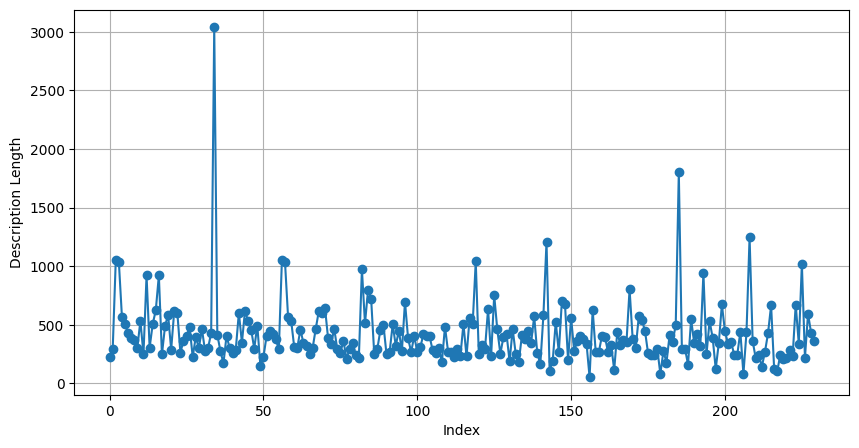

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df['description_length'] = df['full_description'].str.split(" ").str.len()

plt.figure(figsize=(10, 5))
plt.plot(df.index, df['description_length'], marker='o', linestyle='-')

plt.xlabel("Index")
plt.ylabel("Description Length")
plt.grid(True)

plt.show()


In [ ]:
# Tìm hàng có full_description dài nhất
longest_description = df.loc[df['full_description'].str.len().idxmax(), 'full_description']

# In ra full_description dài nhất
print(longest_description)


Tên sách: Rừng Nauy (Tái Bản). Tác giả: Haruki Murakami. Thể loại: Tiểu Thuyết Phương Đông. Highlight: "Câu chuyện tình yêu giản dị và cảm động, đầy sự chân thành. Ngôn ngữ tinh tế, hài hước và đầy cảm xúc, làm say mê độc giả. Thể hiện sự bất toàn và vụng về của con người trong tình yêu và cuộc sống.". Mô tả: Câu chuyện bắt đầu từ một chuyến bay trong ngày mưa ảm đạm, một người đàn ông 37 tuổi chợt nghe thấy bài hát gắn liền với hình ảnh người yêu cũ, thế là quá khứ ùa về xâm chiếm thực tại. Mười tám năm trước, người đàn ông ấy là chàng Toru Wanatabe trẻ trung, mỗi chủ nhật lại cùng nàng Naoko lang thang vô định trên những con phố Tokyo. Họ sánh bước bên nhau để thấy mình còn sống, còn tồn tại, và gắng gượng tiếp tục sống, tiếp tục tồn tại sau cái chết của người bạn cũ Kizuki. Cho đến khi Toru nhận ra rằng mình thực sự yêu và cần có Naoko thì cũng là lúc nàng không thể chạy trốn những ám ảnh quá khứ, không thể hòa nhập với cuộc sống thực tại và trở về dưỡng bệnh trong một khu trị liệu 

In [ ]:
import time

def summarize(full_description, client):
    if pd.isna(full_description) or full_description.strip() == "":
        return ""

    response = client.chat.completions.create(
        messages=[
            {
                "role": "user",
                "content": (
                    "Hãy trích xuất nội dung của đoạn mô tả sách mà tôi cung cấp. \n"
                    "Yêu cầu đầu ra: \n"
                    "- Bao gồm các thông tin: Tên sách, Tác giả, thông tin tác giả (nếu có), năm xuất bản (nếu có), "
                    "nhà xuất bản (nếu có), nội dung tóm tắt, nhận xét về cuốn sách (nếu có), giải thưởng (nếu có).\n"
                    "- Chỉ ghi thông tin được yêu cầu, không thêm thông tin không liên quan.\n\n"
                    f"Đoạn mô tả: {full_description}"
                ),
            }
        ],
        model='gemma2-9b-it',
    )

    time.sleep(1)
    return response.choices[0].message.content

In [ ]:
from groq import Groq

client = Groq(api_key=GROQ_API_KEY)

df['full_description'] = df['full_description'].fillna('')
df['summarize'] = df['full_description'].apply(lambda x: summarize(x, client))

In [ ]:
df['summarize'][1]

'- Tên sách: Bí Ẩn Phố Âm Dương\n- Tác giả: Hà Mạt Bì\n- Nội dung tóm tắt: Năm Trung Hoa Dân Quốc thứ 34, một trận bão tuyết đã làm tốc mái nhà số 1294 trên phố Âm Dương, và người ta đã tìm thấy một xác chết phân hủy nặng. Trưởng phòng điều tra tội phạm mới được bổ nhiệm (Vương Khắc Phi) và một nữ bác sĩ pháp y du học ở Pháp (Hạ Nhược Sinh) cùng nhau bắt tay phá án, lột kén kéo tơ từ trùng trùng manh mối để tìm ra kẻ sát nhân; nhưng chất kích dục và động cơ của tên sát nhân lại mờ mịt tới khó hiểu, dồn họ không còn đường xoay sở. Khi xưởng thịt người ở phố Âm Dương bị phanh phui, tám xác chết khác nổi lên trên mặt nước và nhiều nhân vật khác nhau lần lượt xuất hiện… Liệu Vương Khắc Phi và Hà Nhược Sinh có thể tìm ra được chất kịch độc hơn cả thạch tín cũng như thủ pháp hành sự vô cùng bí ẩn của hung thủ hay không? \n'

In [ ]:
import pandas as pd

# df = pd.read_csv("proprocessed_data.csv")

import re

def preprocess_text(text):
    # Thay thế các ký tự không mong muốn
    text = text.replace("\xa0", " ")

    # Chuẩn hóa khoảng trắng và dấu câu
    text = re.sub(r'([,.!?;:])([^\s])', r'\1 \2', text)
    text = re.sub(r'[ \t]+', ' ', text)

    # Xóa các ký tự Markdown và ký hiệu đặc biệt không cần thiết
    text = re.sub(r'\*+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'-', '', text)

    text = text.strip()

    return text

df['summarize'] = df['summarize'].apply(preprocess_text)


In [ ]:
df.head(1)

,name,author,category,description,highlight,price,full_description,description_length,summarize
0,Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản),Higashino Keigo,Truyện ngắn - Tản văn - Tạp Văn Nước Ngoài,Điều Kỳ Diệu Của Tiệm Tạp Hóa Một đêm vội vã l...,"['Cốt truyện hấp dẫn và đầy bất ngờ.', 'Cấu tr...",81900,Tên sách: Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA...,225,- Tên sách: Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMI...


In [ ]:
df.to_csv("proprocessed_data.csv", index=False, encoding="utf-8-sig")

In [ ]:
df = pd.read_csv("proprocessed_data.csv")
df['summarize'][6]

'Tên sách: Thiên Tài Bên Trái, Kẻ Điên Bên Phải (Tái Bản)\n Tác giả: Cao Minh\n Nội dung tóm tắt: \nCuốn sách mời bạn bước vào thế giới của những người đặc biệt, những người "khác biệt, không quan tâm đến quy tắc"  những con người mà thế giới gọi là kẻ điên. Cuốn sách đặt ra ý tưởng về ranh giới mỏng mảnh giữa thiên tài và kẻ điên, rằng chỉ những người đủ "điên rồ" mới dám nghĩ rằng họ có thể thay đổi thế giới. \n Nhận xét về cuốn sách: Ngôn ngữ sắc sảo, sâu sắc và gần gũi, khai mở suy nghĩ và tạo động lực. Dịch giả Thu Hương có tài và kinh nghiệm.'

In [ ]:
!pip install -q -U google-genai==1.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.4/142.4 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.9/169.9 kB 7.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from google.colab import userdata
GG_API_KEY=userdata.get('GOOGLE_TOKEN')

df = pd.read_csv('/content/proprocessed_data.csv')
df.head(1)

,name,author,category,description,highlight,price,full_description,description_length,summarize
0,Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản),Higashino Keigo,Truyện ngắn - Tản văn - Tạp Văn Nước Ngoài,Điều Kỳ Diệu Của Tiệm Tạp Hóa Một đêm vội vã l...,"['Cốt truyện hấp dẫn và đầy bất ngờ.', 'Cấu tr...",81900,Tên sách: Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA...,225,Tên sách: Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA...


In [ ]:
from google import genai
import numpy as np

client = genai.Client(api_key=GG_API_KEY)

def get_embedding(text:str) -> list[float]:
    if not text.strip():
        print('Attemped to get embedding for empty text.')
        return []

    vector = client.models.embed_content(
        model='text-embedding-004',
        contents=text
    )

    return vector.embeddings[0].values

df['embedding_vector'] = df['summarize'].apply(get_embedding)
df.head(1)

,name,author,category,description,highlight,price,full_description,description_length,summarize,embedding_vector
0,Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA (Tái Bản),Higashino Keigo,Truyện ngắn - Tản văn - Tạp Văn Nước Ngoài,Điều Kỳ Diệu Của Tiệm Tạp Hóa Một đêm vội vã l...,"['Cốt truyện hấp dẫn và đầy bất ngờ.', 'Cấu tr...",81900,Tên sách: Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA...,225,Tên sách: Điều Kỳ Diệu Của Tiệm Tạp Hóa NAMIYA...,"[0.01713908, 0.093419075, -0.04598287, -0.0330..."


In [ ]:
df.columns

Index(['name', 'author', 'category', 'description', 'highlight', 'price',
       'full_description', 'description_length', 'summarize',
       'embedding_vector'],
      dtype='object')

In [ ]:
df.to_csv("embedding_data.csv", index=False)